Importing required libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data from Google sheets

In [37]:
sheet_id = "1HbTO-7yTR-7BIUVv2BiiPcGwViPoxp4Y"
xls_url ="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id , "Sheet1")
df = pd.read_csv(xls_url , header=None , names =['careers'])

To display the first 10 rows of Data Frame

In [38]:
df.head(10)

,careers
0,cokter
1,dentiists
2,Enginir
3,PoLICE
4,engneiear
5,DOcTRO
6,dentists
7,POLICE
8,enjeineaar
9,DENTISTT


Implementing levenshtein function 

In [39]:
def levenshtein(w1,w2):
    l1=len(w1)
    l2=len(w2)
    dp=np.zeros((l1+1,l2+1))
    for i in range (l1+1):
        dp[i][0]=i
    for i in range (l2+1):
        dp[0][i]=i
    for row in range (1,l1+1):
        for col in range (1,l2+1):
            if(w1[row-1]==w2[col-1]):
                dp[row][col]=dp[row-1][col-1]
            else:
                mini=min(dp[row-1][col],dp[row][col-1],dp[row-1][col-1])
                dp[row][col]=mini+1
    return dp[l1][l2]



Creating a list of aspirations with correct spellings

In [40]:
correct_words=["doctor", "lawyer", "teacher", "engineer", "accountant", "nurse", "police", "architect", "denstist", "pharmacist"]

Code to correct the spelling of each proffesions

In [41]:
for index, row in df.iterrows():
    min_dist=10
    for j in correct_words:
        dist = levenshtein(str(row["careers"]).lower(), j)  
        if dist < min_dist:
            min_dist=dist
            correct_word=j
    df.at[index, "careers"] = correct_word

Calculating the frequency of each aspiration 

In [42]:
freq_words=[0,0,0,0,0,0,0,0,0,0]
for index, row in df.iterrows():
        for j in range (len(correct_words)):
            if (row["careers"]==correct_words[j]):
                freq_words[j]+=1

Printing the frequency of each aspirations

In [46]:
print(correct_words)
print(freq_words)

['doctor', 'lawyer', 'teacher', 'engineer', 'accountant', 'nurse', 'police', 'architect', 'denstist', 'pharmacist']
[225, 82, 195, 328, 32, 85, 162, 63, 192, 42]


Plotting the graph of Aspirations vs Frequency

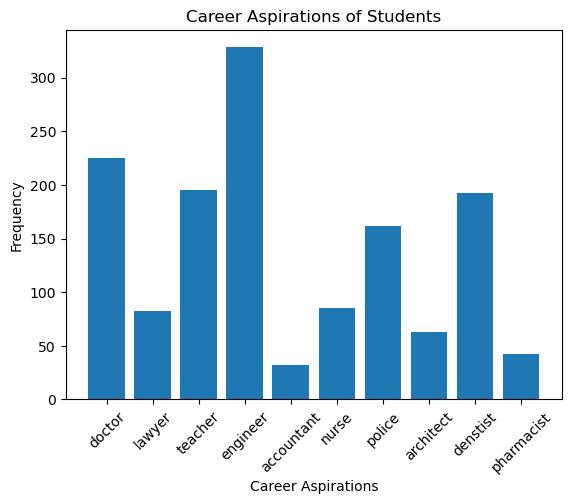

In [45]:
plt.bar(correct_words, freq_words)
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.title('Career Aspirations of Students')
plt.xticks(rotation=45) 
plt.show()
